In [19]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
import pickle

from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

import xgboost as xgb 

In [7]:
df = pd.read_csv("heart.csv")
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [8]:
df.replace('No, borderline diabetes', 'No', inplace=True)
df.replace('Yes (during pregnancy)', 'Yes', inplace=True)

yes_no_columns = ['HeartDisease','Smoking','AlcoholDrinking','Stroke','DiffWalking',
                  'Diabetic','PhysicalActivity','Asthma','KidneyDisease','SkinCancer']
  
for col in yes_no_columns:
    df[col].replace({'Yes': 1,'No': 0},inplace=True)

df['Sex'] = df['Sex'].map({'Male': 1, 'Female': 0})
df = df.drop(["GenHealth", "Race", "AgeCategory", "PhysicalHealth", "MentalHealth"], axis=1)

In [9]:
X = df.drop('HeartDisease', axis=1)
y = df['HeartDisease']

smote = SMOTE()

X_resampled, y_resampled = smote.fit_resample(X, y)

In [10]:
df = pd.concat([X_resampled, y_resampled], axis="columns")
df.head()

,BMI,Smoking,AlcoholDrinking,Stroke,DiffWalking,Sex,Diabetic,PhysicalActivity,SleepTime,Asthma,KidneyDisease,SkinCancer,HeartDisease
0,16.60,1,0,0,0,0,1,1,5.0,1,0,1,0
1,20.34,0,0,1,0,0,0,1,7.0,0,0,0,0
2,26.58,1,0,0,0,1,1,1,8.0,1,0,0,0
3,24.21,0,0,0,0,0,0,0,6.0,0,0,1,0
4,23.71,0,0,0,1,0,0,1,8.0,0,0,0,0


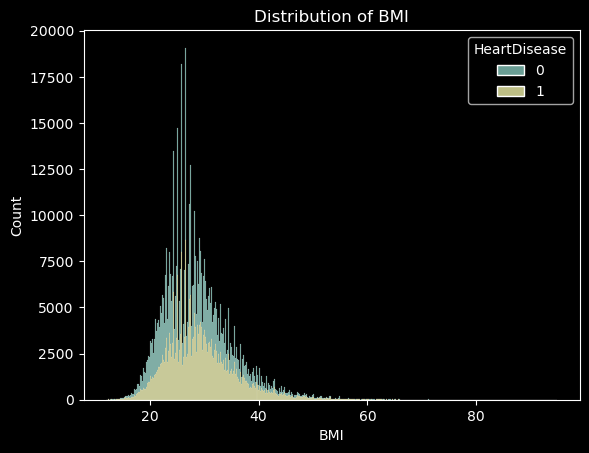

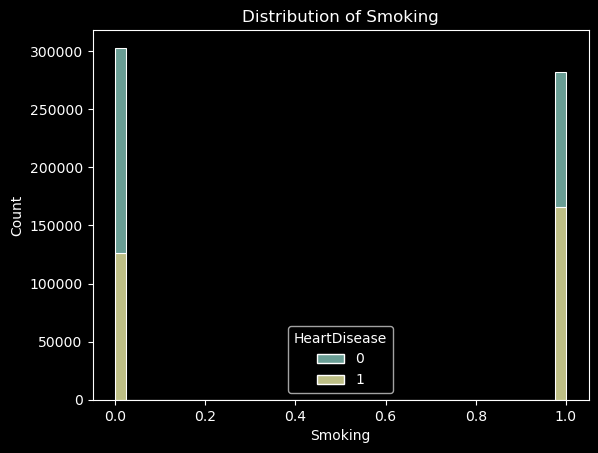

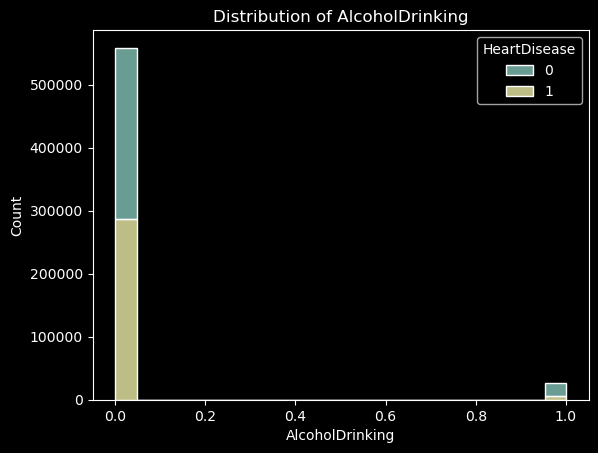

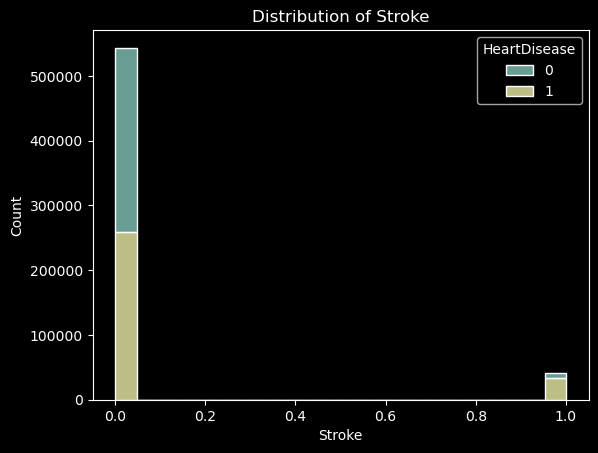

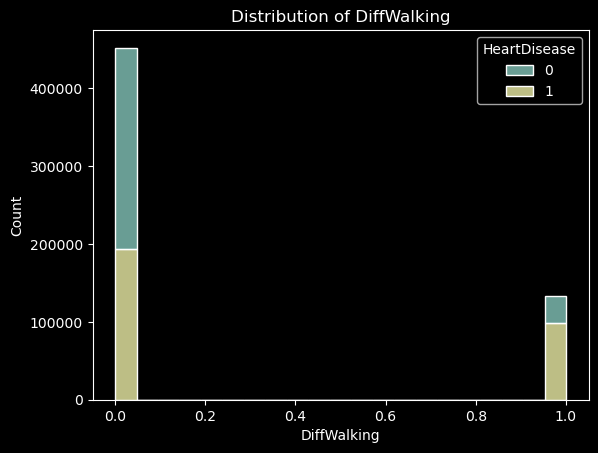

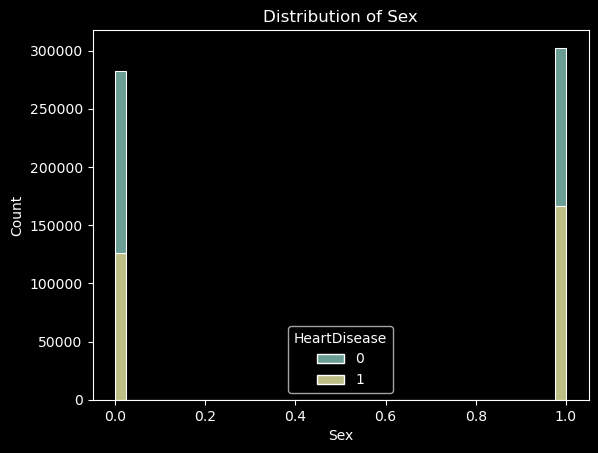

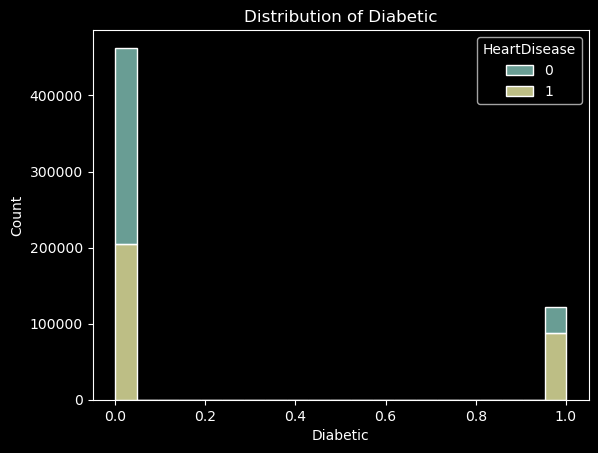

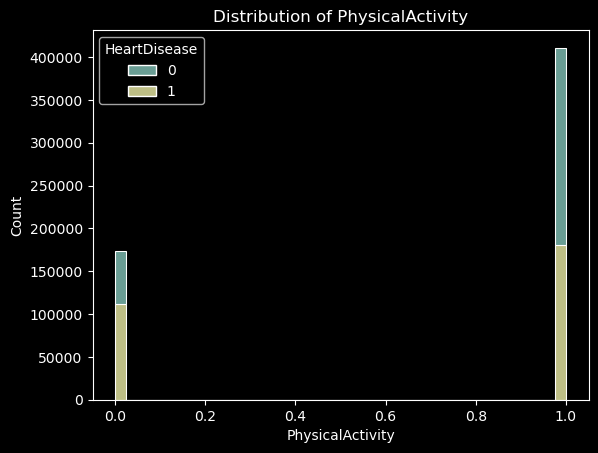

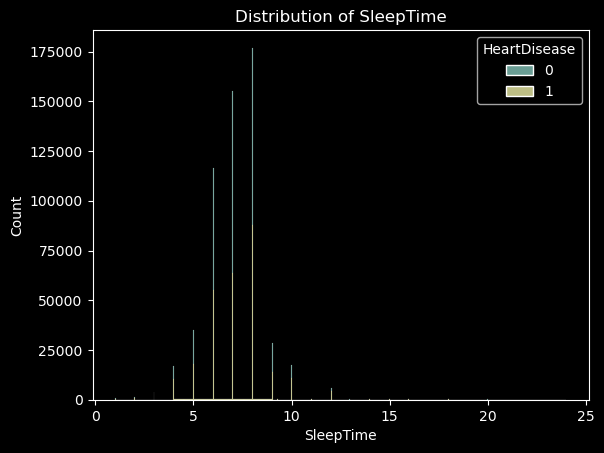

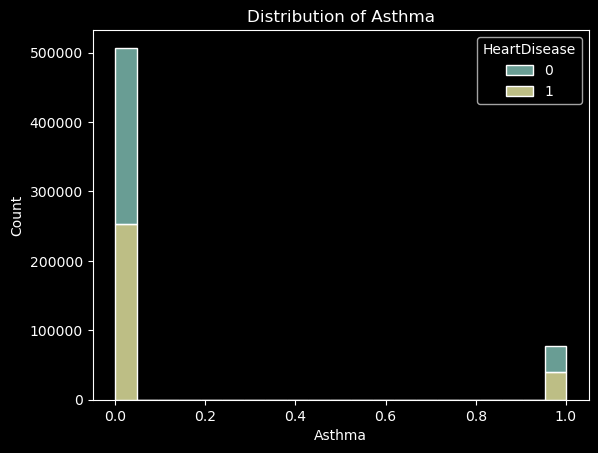

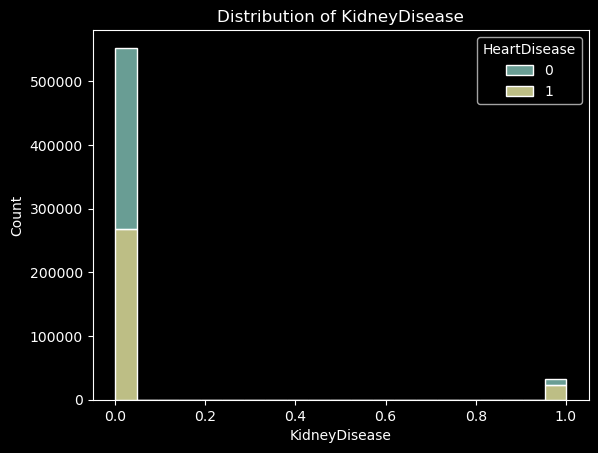

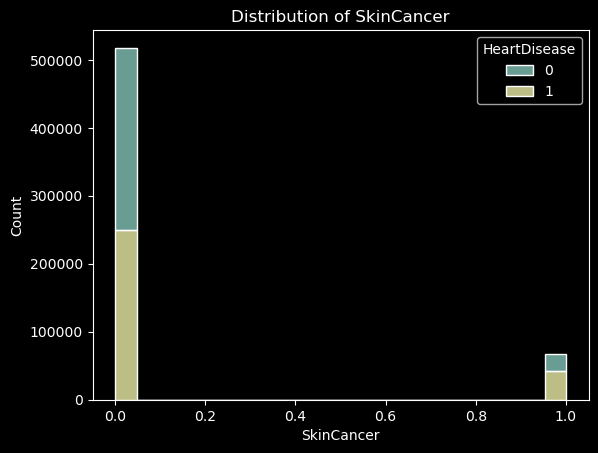

In [11]:
for column in X_resampled.columns:
    plt.figure()
    sns.histplot(data=df, x=column, hue='HeartDisease', multiple='stack')
    plt.title(f'Distribution of {column}')
    plt.show()

(13.5, -0.5)

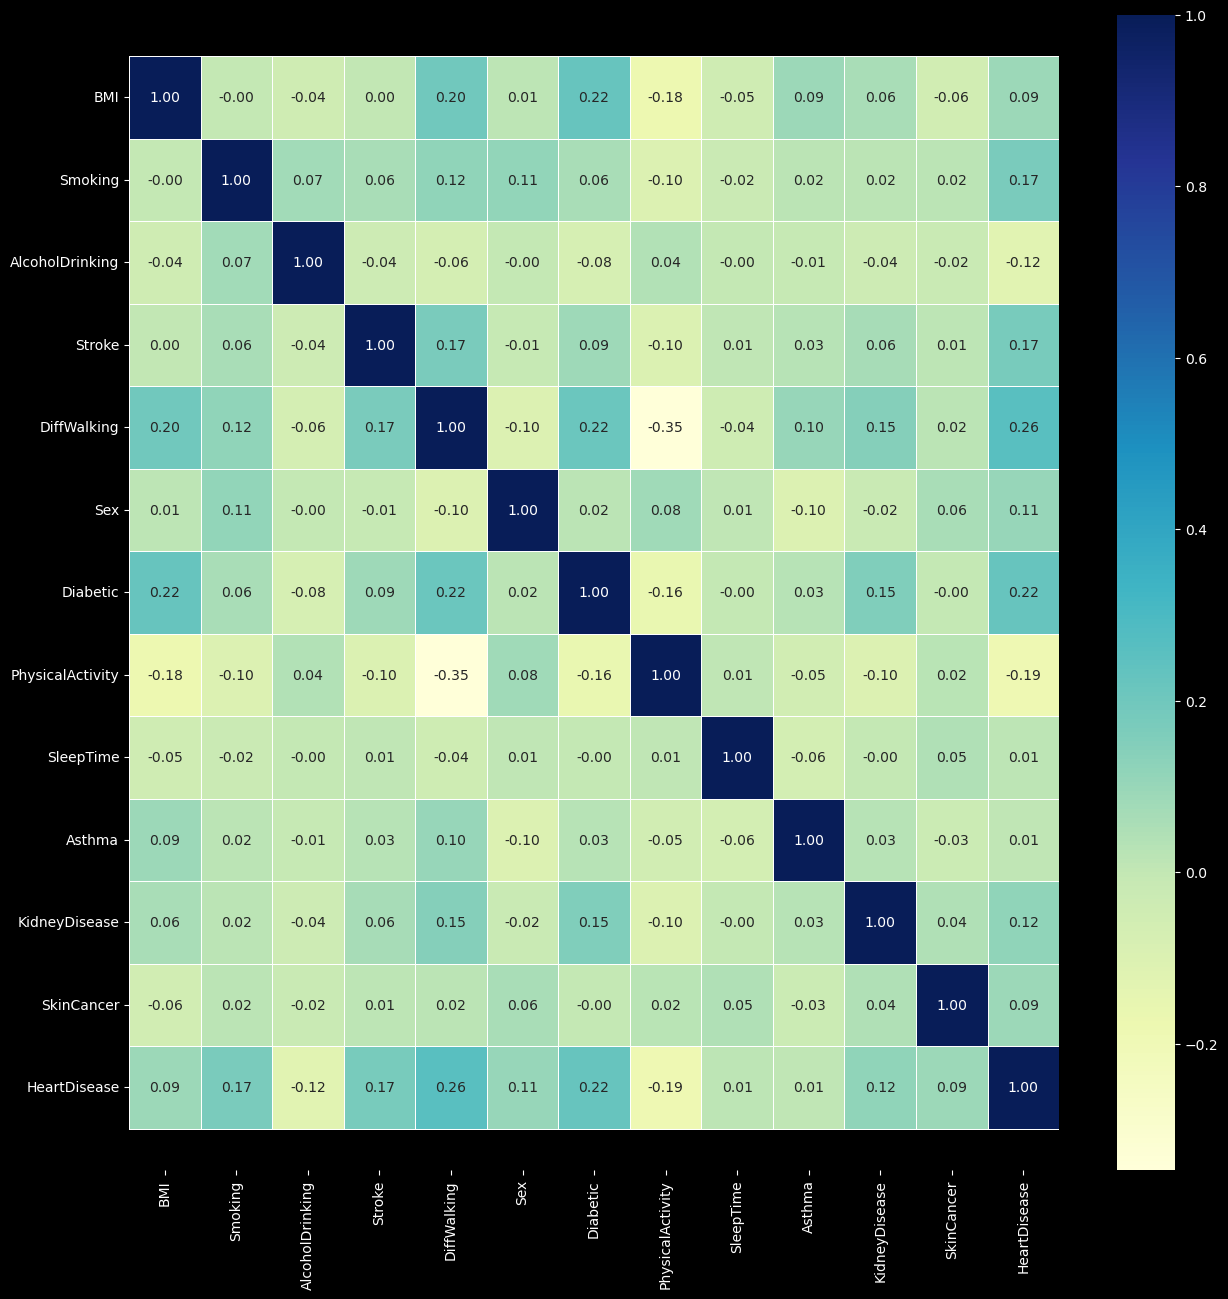

In [12]:
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(15, 15))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu");
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

<Axes: title={'center': 'Correlation with target'}>

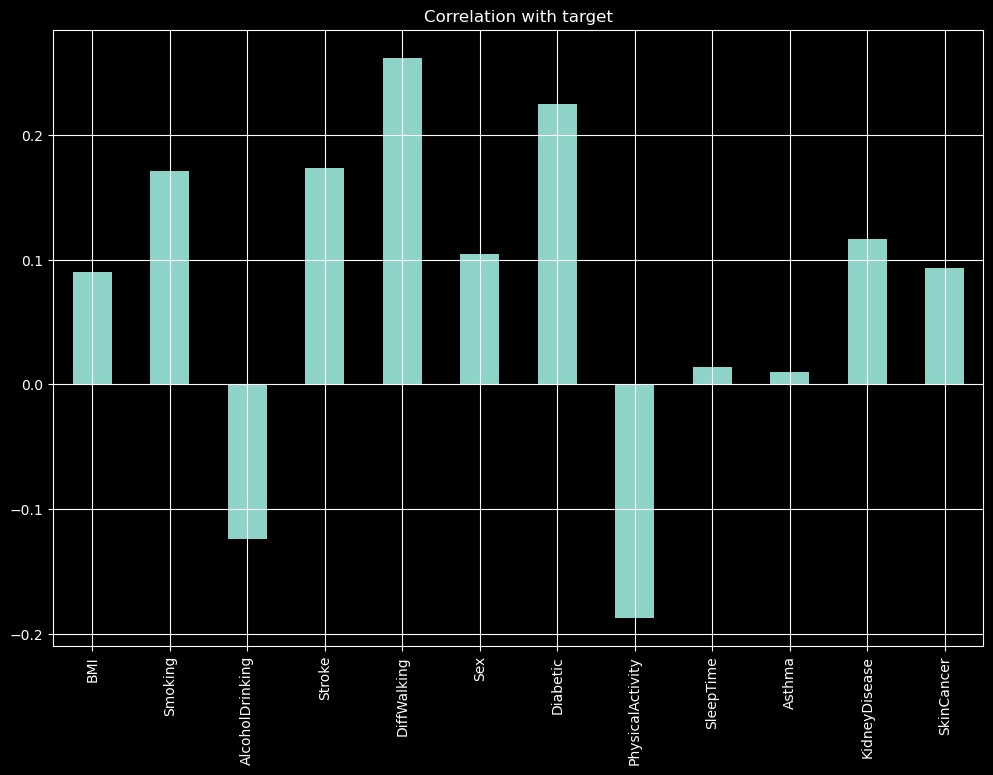

In [13]:
df.drop('HeartDisease', axis=1).corrwith(df.HeartDisease).plot(kind='bar', grid=True, figsize=(12, 8), 
                                                   title="Correlation with target")

In [14]:
df.drop(["PhysicalActivity", "SleepTime", "Asthma", "AlcoholDrinking"], axis="columns", inplace=True)

<Axes: title={'center': 'Correlation with target'}>

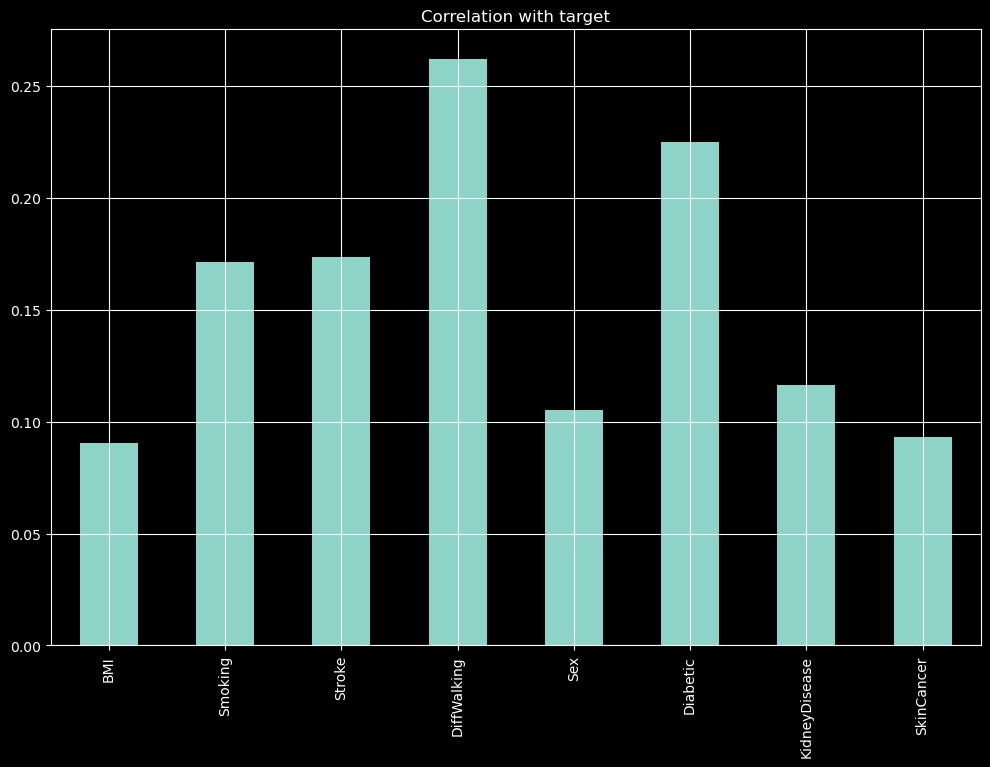

In [15]:
df.drop('HeartDisease', axis=1).corrwith(df.HeartDisease).plot(kind='bar', grid=True, figsize=(12, 8), 
                                                   title="Correlation with target")

In [16]:
X = df.drop('HeartDisease', axis=1)
y = df["HeartDisease"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.28, random_state=42)

In [17]:
model = xgb.XGBClassifier(learning_rate=1)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8256135615576738


In [20]:
# Generate the classification report
y_pred = model.predict(X_test)

report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)

# Generate the confusion matrix
confusion = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(confusion)

# Calculate the accuracy score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy Score:", accuracy)

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.86      0.83     81855
           1       0.85      0.79      0.82     81902

    accuracy                           0.83    163757
   macro avg       0.83      0.83      0.83    163757
weighted avg       0.83      0.83      0.83    163757

Confusion Matrix:
[[70175 11680]
 [16877 65025]]
Accuracy Score: 0.8256135615576738


In [21]:
model.save_model("heart_disease.xgb")